Explorations and Predictions using the Covid Dataset available at [Data on COVID-19 (coronavirus) by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data).

[Coronavirus Pandemic (COVID-19)](https://ourworldindata.org/covid-vaccinations)

Date of Data Retrieval: Feb 18, 2022

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [17]:
covid = pd.read_csv('owid-covid-data.csv')

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162607 entries, 0 to 162606
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    162607 non-null  object 
 1   continent                                   152859 non-null  object 
 2   location                                    162607 non-null  object 
 3   date                                        162607 non-null  object 
 4   total_cases                                 159642 non-null  float64
 5   new_cases                                   159616 non-null  float64
 6   new_cases_smoothed                          158465 non-null  float64
 7   total_deaths                                141946 non-null  float64
 8   new_deaths                                  142122 non-null  float64
 9   new_deaths_smoothed                         141992 non-null  float64
 

In [10]:
#https://www.iso.org/obp/ui/#search
covid['iso_code'].unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'OWID_

In [6]:
covid['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [7]:
covid['continent'].value_counts(dropna=False)

Africa           38537
Europe           36277
Asia             35405
North America    24370
NaN               9748
South America     9309
Oceania           8961
Name: continent, dtype: int64

In [8]:
covid[covid['continent'].isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
725,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160521,OWID_WRL,NaN,World,2022-02-13,411738105.0,1454191.0,2322687.714,5816328.0,5069.0,10684.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
160522,OWID_WRL,NaN,World,2022-02-14,413526543.0,1788438.0,2258593.714,5826973.0,10645.0,10681.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
160523,OWID_WRL,NaN,World,2022-02-15,415291868.0,1765325.0,2063782.714,5837539.0,10566.0,10294.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
160524,OWID_WRL,NaN,World,2022-02-16,417730572.0,2438704.0,2062385.286,5850628.0,13089.0,10262.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


In [18]:
jam = covid[covid['iso_code']=='JAM']

In [19]:
jam['extreme_poverty'].unique()

array([nan])

In [20]:
jam

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
74678,JAM,North America,Jamaica,2020-03-11,1.0,1.0,NaN,NaN,NaN,NaN,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
74679,JAM,North America,Jamaica,2020-03-12,2.0,1.0,NaN,NaN,NaN,NaN,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
74680,JAM,North America,Jamaica,2020-03-13,8.0,6.0,NaN,NaN,NaN,NaN,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
74681,JAM,North America,Jamaica,2020-03-14,8.0,0.0,NaN,NaN,NaN,NaN,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
74682,JAM,North America,Jamaica,2020-03-15,10.0,2.0,NaN,NaN,NaN,NaN,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75382,JAM,North America,Jamaica,2022-02-13,127054.0,168.0,151.571,2739.0,1.0,6.429,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
75383,JAM,North America,Jamaica,2022-02-14,127163.0,109.0,134.429,2750.0,11.0,7.429,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
75384,JAM,North America,Jamaica,2022-02-15,127233.0,70.0,126.143,2750.0,0.0,7.286,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN
75385,JAM,North America,Jamaica,2022-02-16,127294.0,61.0,122.429,2755.0,5.0,7.000,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN


In [27]:
jam.sort_values('date', ascending=False).head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
75386,JAM,North America,Jamaica,2022-02-17,127377.0,83.0,112.571,2769.0,14.0,8.714,...,5.3,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN


In [30]:
jam['year'] = pd.DatetimeIndex(jam['date']).year

C:\Users\jevwe\AppData\Local\Temp/ipykernel_25296/3590805566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jam['year'] = pd.DatetimeIndex(jam['date']).year


In [41]:
jam[jam['date']=='2020-04-01']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
74699,JAM,North America,Jamaica,2020-04-01,44.0,8.0,2.571,3.0,2.0,0.286,...,28.6,66.425,1.7,74.47,0.734,NaN,NaN,NaN,NaN,2020


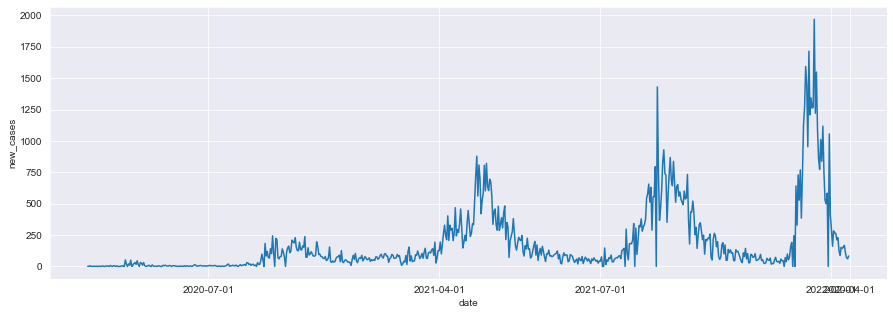

In [42]:
plt.figure(figsize=(15, 5))
g = sns.lineplot(data=jam, x='date', y='new_cases')
g.set_xticks(['2020-02-01', '2020-07-01', '2021-02-01', '2021-07-01', '2022-02-01'])
g.set_xticklabels(['2020-04-01', '2020-07-01', '2021-04-01', '2021-07-01', '2022-02-01'])

plt.show()